In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from mice_dfi import plots

## Load data

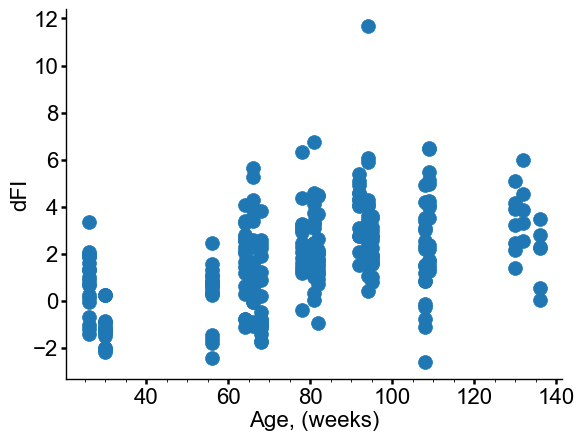

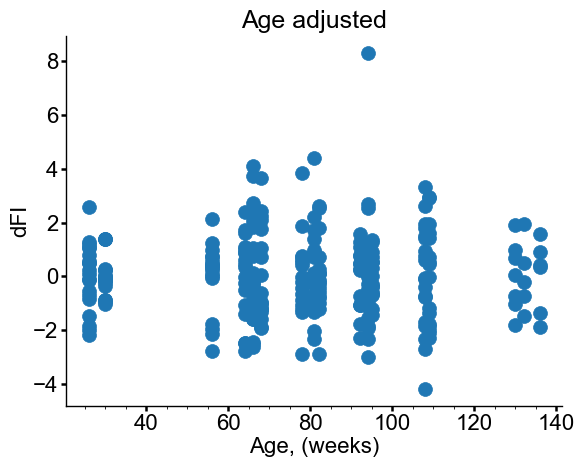

In [2]:
df_validation = pd.read_csv('./generated/validation_data.csv')
df_validation_control = df_validation[df_validation.label.isin(['MA0071_F', 'MA0072_M',  'MA0071_M'])].copy()

df_validation_control_age_adj = plots.linear_detrending(df_validation_control, ['dFI', 'pfi'],
                                                        key_dtr=['age', 'sex', 'label'], how='groupby', inplace=True)

plots.set_style()
plt.scatter(df_validation_control.age, df_validation_control.dFI)
plt.xlabel('Age, (weeks)')
plt.ylabel('dFI')
plt.show()

plt.scatter(df_validation_control_age_adj.age, df_validation_control_age_adj.dFI)
plt.xlabel('Age, (weeks)')
plt.ylabel('dFI')
plt.title('Age adjusted')
plt.show()

## Fit data and plot

In [3]:
fileformat = 'svg'
os.makedirs('./figs',exist_ok=True)  # saving pngs
os.makedirs('./source',exist_ok=True)  # saving source data
bbox_inches = None # None  or 'tight'
production = True
plots.set_style(production=production)
cm = 1/2.54  # centimeters in inches
dpi=300
if production:
    fig_size = 8.8 * cm
    fontsize = 7
    scale=0.5
else:
    fig_size = 18. * cm
    fontsize = 16
    scale= 1

Mice dt=14 weeks: 40 Mice dt=28 weeks: 19


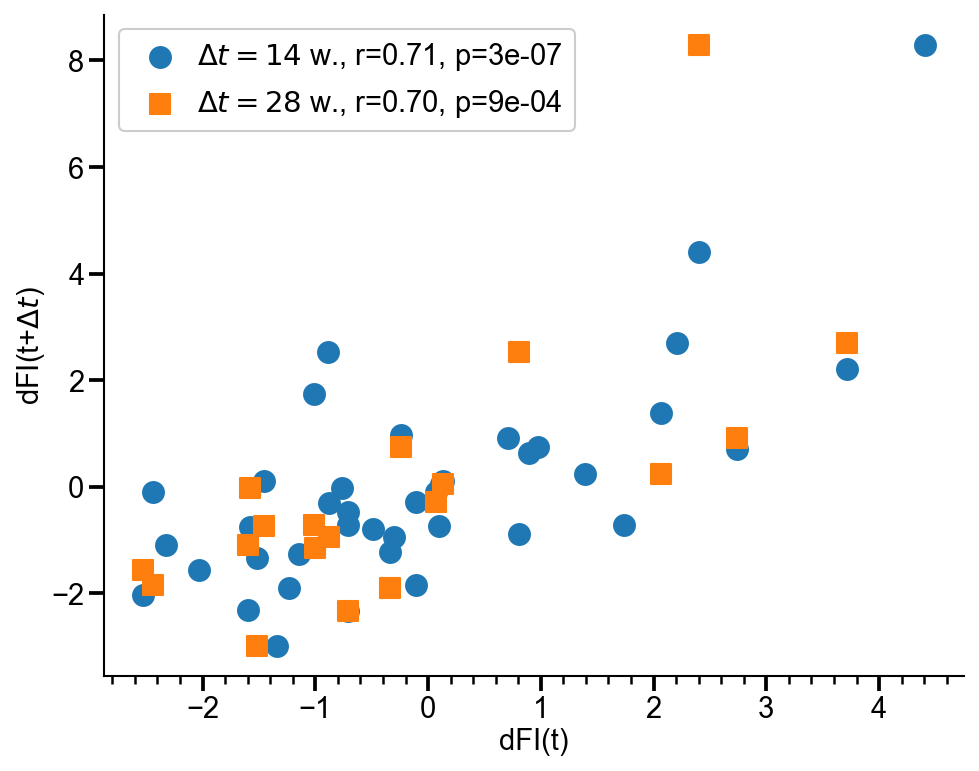

In [4]:
figsize=(fig_size,fig_size*0.8)
figname = 'fig2_timelag_validation'

# Plot dFI vs dFI
dfi_14_0, dfi_14_1, _ = plots.get_pairs_longitudinal(
    df_validation_control_age_adj, ['dFI'], None, dt=14.0, dt_tol=1.5,
    normalize=False, unique_age=False, age_max=100, max_pairs=10,  index=True)
dfi_28_0, dfi_28_1 =  plots.get_pairs_longitudinal(
    df_validation_control_age_adj, ['dFI'], None, dt=28.0, dt_tol=1.5,
   normalize=False, unique_age=False, age_max=100, max_pairs=10)

print("Mice dt=14 weeks:", len(dfi_14_0), "Mice dt=28 weeks:", len(dfi_28_0))
fig = plt.figure(figsize=figsize, dpi=300)
ax = plt.gca()
ax.scatter(dfi_14_0.flatten(), dfi_14_1.flatten(), 
           label=plots.stats_to_str(dfi_14_0.flatten(), dfi_14_1.flatten(),text='$\Delta t=14$ w.,', pdig=3))
ax.scatter( dfi_28_0.flatten(), dfi_28_1.flatten(), 
           label=plots.stats_to_str(dfi_28_0.flatten(), dfi_28_1.flatten(), text='$\Delta t=28$ w.,', pdig=3), marker='s')

ax.legend(loc=0, fontsize=fontsize, ncol=1, framealpha=1, frameon=True)
ax.set_xlabel('%s(t)'  % ('dFI'))
ax.set_ylabel('%s(t+$\Delta t$)'  % ('dFI'))
fig.tight_layout()
fig.savefig('./figs/{:s}.{:s}'.format(figname, fileformat), bbox_inches=bbox_inches, dpi=300)
plt.show()

# Save data source for NC submission
for tag, pair in zip( ('dt_14_week','dt_28_week'), ((dfi_14_0, dfi_14_1), (dfi_28_0, dfi_28_1))):
    source = pd.DataFrame(np.column_stack(pair))
    try:
        with pd.ExcelWriter('./source/{:s}.xlsx'.format(figname), engine="openpyxl",  mode="a", if_sheet_exists="replace") as writer:
            source.to_excel(writer, sheet_name=tag)
    except FileNotFoundError:
        with pd.ExcelWriter('./source/{:s}.xlsx'.format(figname), engine="openpyxl") as writer:
            source.to_excel(writer, sheet_name=tag)
